## International Coastal Cleanup
Volunteer trash pick up from Norfolk 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
infile = '..\data\International_Coastal_Cleanup.csv' 
data = pd.read_csv(infile, sep=',')

### Size of your data set. How many variables does it contain? How many samples/data points?

In [7]:
data.shape

(69, 53)

There are 69 samples/data points, and 53 variables.

### Data types in your data set.  Are all of the variables the same type? Do you have a combination of types? 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Area                                       69 non-null     object 
 1   Date                                       69 non-null     object 
 2   Cigarette Butts                            69 non-null     int64  
 3   Food Wrappers (candy, chips, etc.)         69 non-null     int64  
 4   Take Out/Away Containers (Plastic)         69 non-null     int64  
 5   Take Out/Away Containers (Foam)            69 non-null     int64  
 6   Bottle Caps (Plastic)                      69 non-null     int64  
 7   Bottle Caps (Metal)                        69 non-null     int64  
 8   Lids (Plastic)                             69 non-null     int64  
 9   Straws, Stirrers                           69 non-null     int64  
 10  Forks, Knives, Spoons       

* Aside from Area and Date, most are object
* Rope collected is in float (since 1 meter is 1 piece, <1 can be collected
 * Total is a float because Rope is a float
* Volunteer Hours and Number of Miles are floats

### Do your data columns contain missing data? Do all variables have the same number of missing data points?
No null / nan values listed, so instead check for 0 values

In [19]:
data.isnull().values.any()
datanon0 = data.astype(bool).sum(axis=0)
datanon0.sort_values(ascending=False)

Area                                         69
Date                                         69
Straws, Stirrers                             65
Volunteer Hours                              65
Number of Volunteers                         65
Total Items Collected                        65
Number of Miles                              65
Bottle Caps (Plastic)                        65
Beverage Bottles (Plastic)                   64
Cigarette Butts                              64
Total Pounds of Litter Collected             64
Food Wrappers (candy, chips, etc.)           63
Beverage Cans                                61
Grocery Bags (Plastic)                       60
Lids (Plastic)                               59
Beverage Bottles (Glass)                     59
Forks, Knives, Spoons                        58
Take Out/Away Containers (Plastic)           58
Cups, Plates (Plastic)                       56
Bottle Caps (Metal)                          55
Other Plastic Bags                      

So, 65 / 69 had the summary stats of Volunteers, Volunteer Hours, Total Items, and Number of Miles, so 4 on the list had no one show up. Total Pounds is at 64 - either there was less than a pound collected at one site, or one site wasn't weighed.

Top 5 are
* Bottle Caps, Straws & Stirrers (65) - found at every site
* Cigarette Butts, Beverage Bottles (64)
* Food Wrappers (63)
* Beverage Cans (61)
* Grocery Bags (60)

Mostly small and light items and related to food

Bottom 5 are
* Toys, Fishing Gear (Clean Swell) (5)
* Other Packaging (Clean Swell) (7)
* Appliances (12)
* Fireworks (13)
* Syringes, Fishing Buoys Pots & Traps (17)

#### How many days?

In [32]:
data.Date.nunique() #27
data.groupby('Date').size().sort_values(ascending=False)

Date
09/30/2016    16
09/30/2017    11
10/05/2019     7
09/30/2018     5
10/13/2018     3
10/22/2022     3
09/20/2021     2
09/24/2022     2
10/16/2021     2
10/22/2021     1
10/18/2019     1
10/20/2022     1
08/23/2021     1
10/23/2021     1
10/26/2019     1
10/28/2018     1
10/17/2018     1
10/09/2022     1
10/15/2022     1
10/13/2021     1
09/04/2021     1
10/08/2021     1
10/06/2022     1
09/28/2019     1
09/25/2021     1
09/21/2019     1
11/05/2022     1
dtype: int64

Most in Septemeber/October, one in August, one in November

Highest value was 9/30/2016, then 9/30/2017 - only date that year. 
* 4 days in 2018
* 5 days in 2019
* 0 days in 2020 (pandemic?)
* 9 days in 2021 - 2 with two sites
* 7 days in 2022 - one with 2 sites, one with 3 sites

So, as event continued, Cleanup had wider spread of days/year but overall stayed ~10 locations/year. 

#### How many locations

In [27]:
data.Area.nunique() #39
data.groupby('Area').size().sort_values(ascending=False)

Area
Willoughby Spit                                                            5
Barraud Park                                                               5
Ocean View Beach Park                                                      5
Old Dominion University                                                    4
Lakewood Park                                                              4
East Ocean View (1300 - 1900 Block)                                        3
The Hague                                                                  3
Bayview Elementary/East Bayview Boulevard                                  3
Harbor Park (ERT)                                                          3
East Ocean View                                                            3
East Oceanview Community Park                                              2
Lafayette Park & Lavalette Boat Ramp                                       2
East Ocean View (1300 - 1800 Block)                                    

39 unique sites out of 64. 11 have >1 uses
* Willoughby Spit, Barraud Park, Ocean View Beach Park (5)
* Old Dominion University, Lakewood Park (4)
* East Ocean View (1300 - 1900 Block), The Hague, Harbor Park (ERT), East Ocean View (3)
* East Oceanview Community Park, Lafayette Park & Lavalette Boat Ramp (2)

However, certain values may be example of inconsistent names
* Every use of Ocean View (don't know enough about area to narrow down what overlaps)
* ODU/Lamberts Point, Lamberts Point, Lambert's Point (ODU Service Learning Group)
* Lafayette Park, Norfolk Collegiate (Lafayette Park - Boat Ramp) 

### Descriptive statistics for your variables of (mean, stdev, median, etc...). 
Boxplots, bar charts and histograms are great for visualizing the distribution of your data.

In [124]:
data.describe()

,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),...,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,Total Pounds of Litter Collected,Number of Volunteers,Volunteer Hours,Number of Miles
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,514.666667,159.246377,18.666667,13.811594,103.521739,236.376812,23.000000,52.797101,14.434783,71.608696,...,0.985507,43.652174,66.000000,127.594203,291.043478,2149.456522,216.231884,19.695652,39.384058,1.556232
std,869.427967,226.114911,22.649936,19.147474,155.625740,935.676212,26.805948,63.438386,21.083502,96.149733,...,2.219517,252.602211,133.862528,377.874252,922.525282,3551.589472,397.070973,28.556602,59.830099,1.540931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,26.000000,2.000000,1.000000,17.000000,1.000000,6.000000,11.000000,1.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,332.000000,45.000000,5.000000,9.000000,1.000000
50%,155.000000,66.000000,8.000000,6.000000,43.000000,17.000000,13.000000,26.000000,7.000000,37.000000,...,0.000000,0.000000,12.000000,15.000000,65.000000,876.000000,90.000000,11.000000,20.000000,1.000000
75%,482.000000,183.000000,31.000000,21.000000,112.000000,39.000000,31.000000,73.000000,20.000000,70.000000,...,1.000000,14.000000,58.000000,88.000000,206.000000,2066.000000,189.000000,23.000000,43.500000,2.000000
max,3639.000000,1203.000000,90.000000,106.000000,780.000000,6269.000000,109.000000,368.000000,136.000000,395.000000,...,14.000000,2093.000000,750.000000,2806.000000,7415.000000,20544.000000,2545.000000,178.000000,396.000000,10.000000


<AxesSubplot:xlabel='Date'>

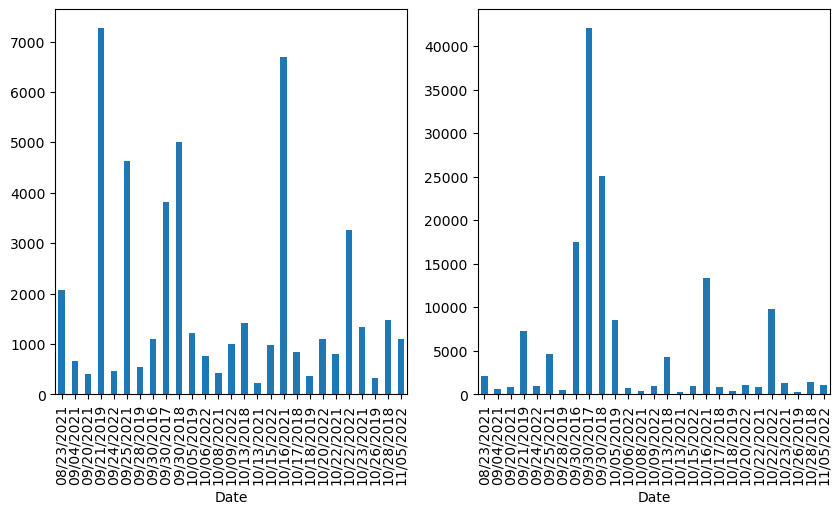

In [135]:
bydatesum = data.groupby('Date')['Total Items Collected'].sum()
bydateavg = data.groupby('Date')['Total Items Collected'].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
bydatesum.plot(kind='bar',ax = axes[0]) 
bydateavg.plot(kind='bar',ax = axes[1])

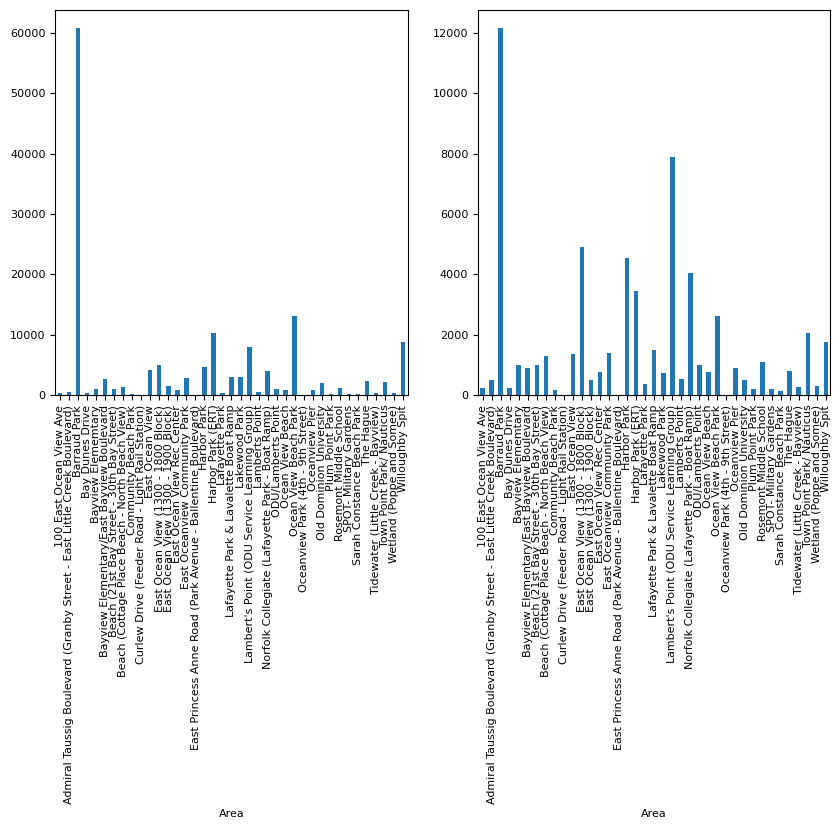

In [139]:
byareasum = data.groupby('Area')['Total Items Collected'].sum()
byareaavg = data.groupby('Area')['Total Items Collected'].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
byareasum.plot(kind='bar',ax = axes[0]) 
byareaavg.plot(kind='bar',ax = axes[1])
plt.rc('font', size=6)          

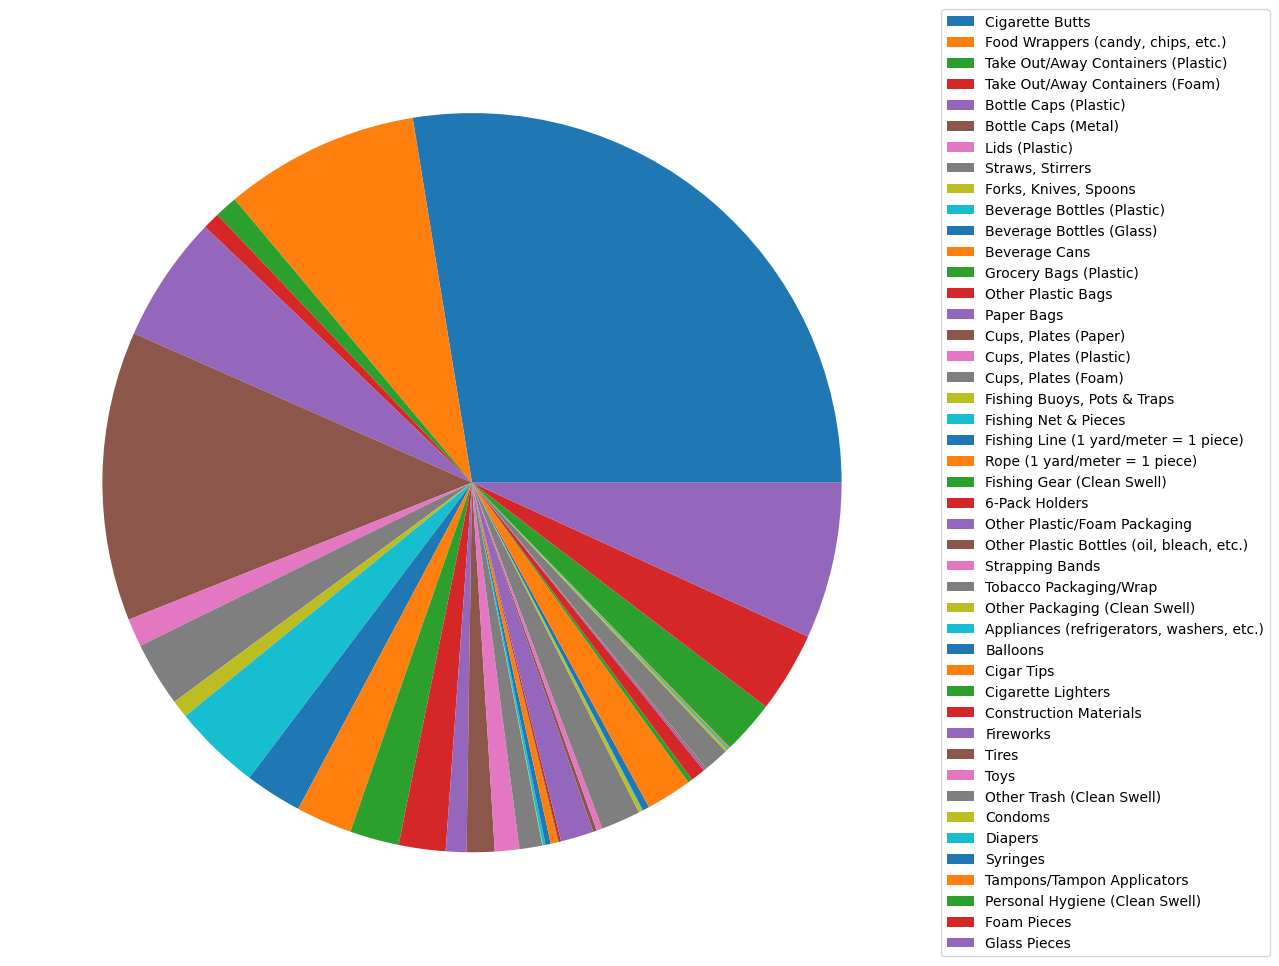

In [61]:
data[data.columns[2:47]].sum().plot.pie(labeldistance=None,legend=True,figsize=[12,12])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Does your data contain Outliers

(0.0, 1000.0)

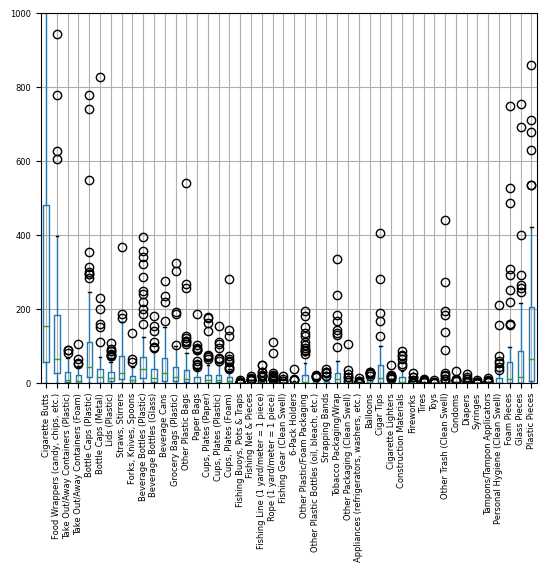

In [104]:
# drop summary variables (48 - 52)
colseries = pd.Series(data.columns)
coladj = colseries.drop([0, 1, 48, 49, 50, 51, 52])
coladj = coladj.astype(str).tolist()
#plot 
data.boxplot(column=coladj,fontsize=6,rot=90)
plt.ylim(0,1000)
#data.plot(kind='box',column=coladj,fontsize=6,rot=90,logy=False) #with log scale for y axis

There are outliers for all kinds of trash collected. Outliers over 1000 are
* Cigarette butts
* Food Wrappers
* Bottle caps (high >6000)
* Beverage Bottles
* Personal Hygiene
* Glass pieces
* Plastic pieces (high >7000)

### How do your variables relate to each other? 
You might look at correlations, scatter plots and/or correlation matrices.

In [119]:
corr = data.corr()
corr.idxmin(axis=0) # what is the least correlated with each type of trash

Cigarette Butts                                  Fishing Gear (Clean Swell)
Food Wrappers (candy, chips, etc.)               Fishing Gear (Clean Swell)
Take Out/Away Containers (Plastic)                                     Toys
Take Out/Away Containers (Foam)                  Fishing Gear (Clean Swell)
Bottle Caps (Plastic)                            Fishing Gear (Clean Swell)
Bottle Caps (Metal)                              Fishing Gear (Clean Swell)
Lids (Plastic)                               Personal Hygiene (Clean Swell)
Straws, Stirrers                                 Fishing Gear (Clean Swell)
Forks, Knives, Spoons                            Fishing Gear (Clean Swell)
Beverage Bottles (Plastic)                       Fishing Gear (Clean Swell)
Beverage Bottles (Glass)                         Fishing Gear (Clean Swell)
Beverage Cans                                    Fishing Gear (Clean Swell)
Grocery Bags (Plastic)                           Fishing Gear (Clean Swell)
Other Plasti

* Fishing Gear (Clean Swell)
* Toys
* Personal Hygiene (Clean Swell)
* Other Packaging (Clean Swell)
* Construction Materials
* Other Trash (Clean Swell)
* Syringes
* Tampons/Tampon Applicators
* Fishing Buoys, Pots & Traps

Which lines up with the items collected at the fewest number of sites. Fishing Gear is he most common. Personal Hygeine was mostly low but did have an outlier site over 1000 - volunteers less willing to pick up than other types of trash?

Other notes
* Personal Hygiene (Clean Swell) is low with Tampons/Tampon Applicators despite being similar categories of trash
* Fishing Gear (Clean Swell) and Construction Materials are inverse both ways - not found at same sites?

In [121]:
corradj = corr.replace(1, np.NaN) # ignore correlations of 1 (with itself)
corradj.idxmax(axis=0) # what is the least correlated with each type of trash

Cigarette Butts                                                  Total Items Collected
Food Wrappers (candy, chips, etc.)                               Total Items Collected
Take Out/Away Containers (Plastic)                                      Lids (Plastic)
Take Out/Away Containers (Foam)                             Beverage Bottles (Plastic)
Bottle Caps (Plastic)                                           Tobacco Packaging/Wrap
Bottle Caps (Metal)                                                       Glass Pieces
Lids (Plastic)                                                  Cups, Plates (Plastic)
Straws, Stirrers                                                 Forks, Knives, Spoons
Forks, Knives, Spoons                                                 Straws, Stirrers
Beverage Bottles (Plastic)                                      Grocery Bags (Plastic)
Beverage Bottles (Glass)                                                  Glass Pieces
Beverage Cans                              

Unsurprisingly, summary statistics are mostly themselves - Volunteer Hours to Total Pounds and Number of Vlunteers.
Total Items however is related to Food Wrappers - because they're so small, easy to find a lot? 
The weirdest is that number of Miles is correlated with Appliances. This was very rare, so presumably when out for a longer time found this and other large trash?

Types of trash correlated with Total Items Collected - all small items that would add to # but not pounds
* Cigarette Butts
* Food Wrappers (candy, chips, etc.)
* Cigar Tips
* Foam Pieces

Other interesting correlations
* Glass pieces and Bottles (glass)  
 * pieces mostly from bottles?
* Take Out/Away Containers (Plastic) and Lids (Plastic)
* Lids (Plastic) and Cups, Plates (Plastic)
* Straws, Stirrers and Forks, Knives, Spoons (vice versa)
* Cups, Plates (Paper) and Cups, Plates (Plastic) (vice versa)
 * food/takeout trash all found the same
* Other Trash (Clean Swell) and Other Packaging (Clean Swell)
 * places with uncategorized trash also had uncategorized packaging
* Condoms and Tires
 * I don't have an explanation, I just find this amusing

<AxesSubplot: xlabel='Lids (Plastic)', ylabel='Forks, Knives, Spoons'>

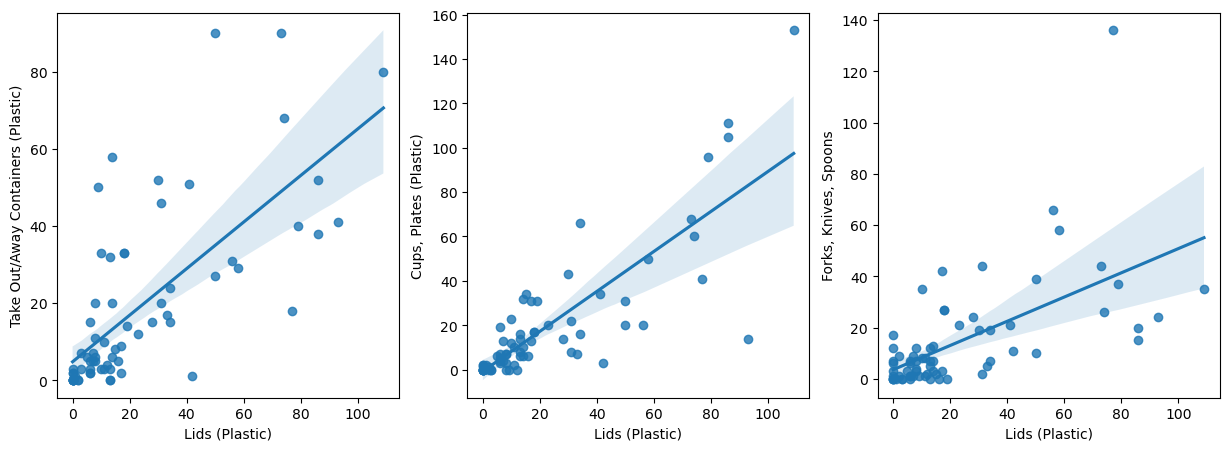

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.regplot(x='Lids (Plastic)',y='Take Out/Away Containers (Plastic)',data=data,fit_reg=True,ax = axes[0])
sns.regplot(x='Lids (Plastic)',y='Cups, Plates (Plastic)',data=data,fit_reg=True,ax = axes[1])
sns.regplot(x='Lids (Plastic)',y='Forks, Knives, Spoons',data=data,fit_reg=True,ax = axes[2])

<AxesSubplot: xlabel='Cups, Plates (Paper)', ylabel='Cups, Plates (Plastic)'>

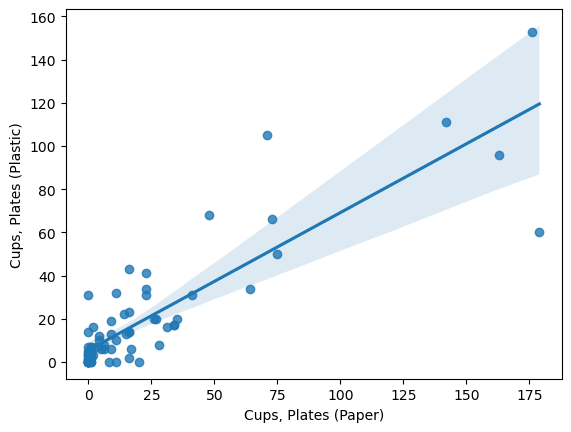

In [91]:
sns.regplot(x='Cups, Plates (Paper)',y='Cups, Plates (Plastic)',data=data,fit_reg=True) 

<AxesSubplot: xlabel='Number of Miles', ylabel='Number of Volunteers'>

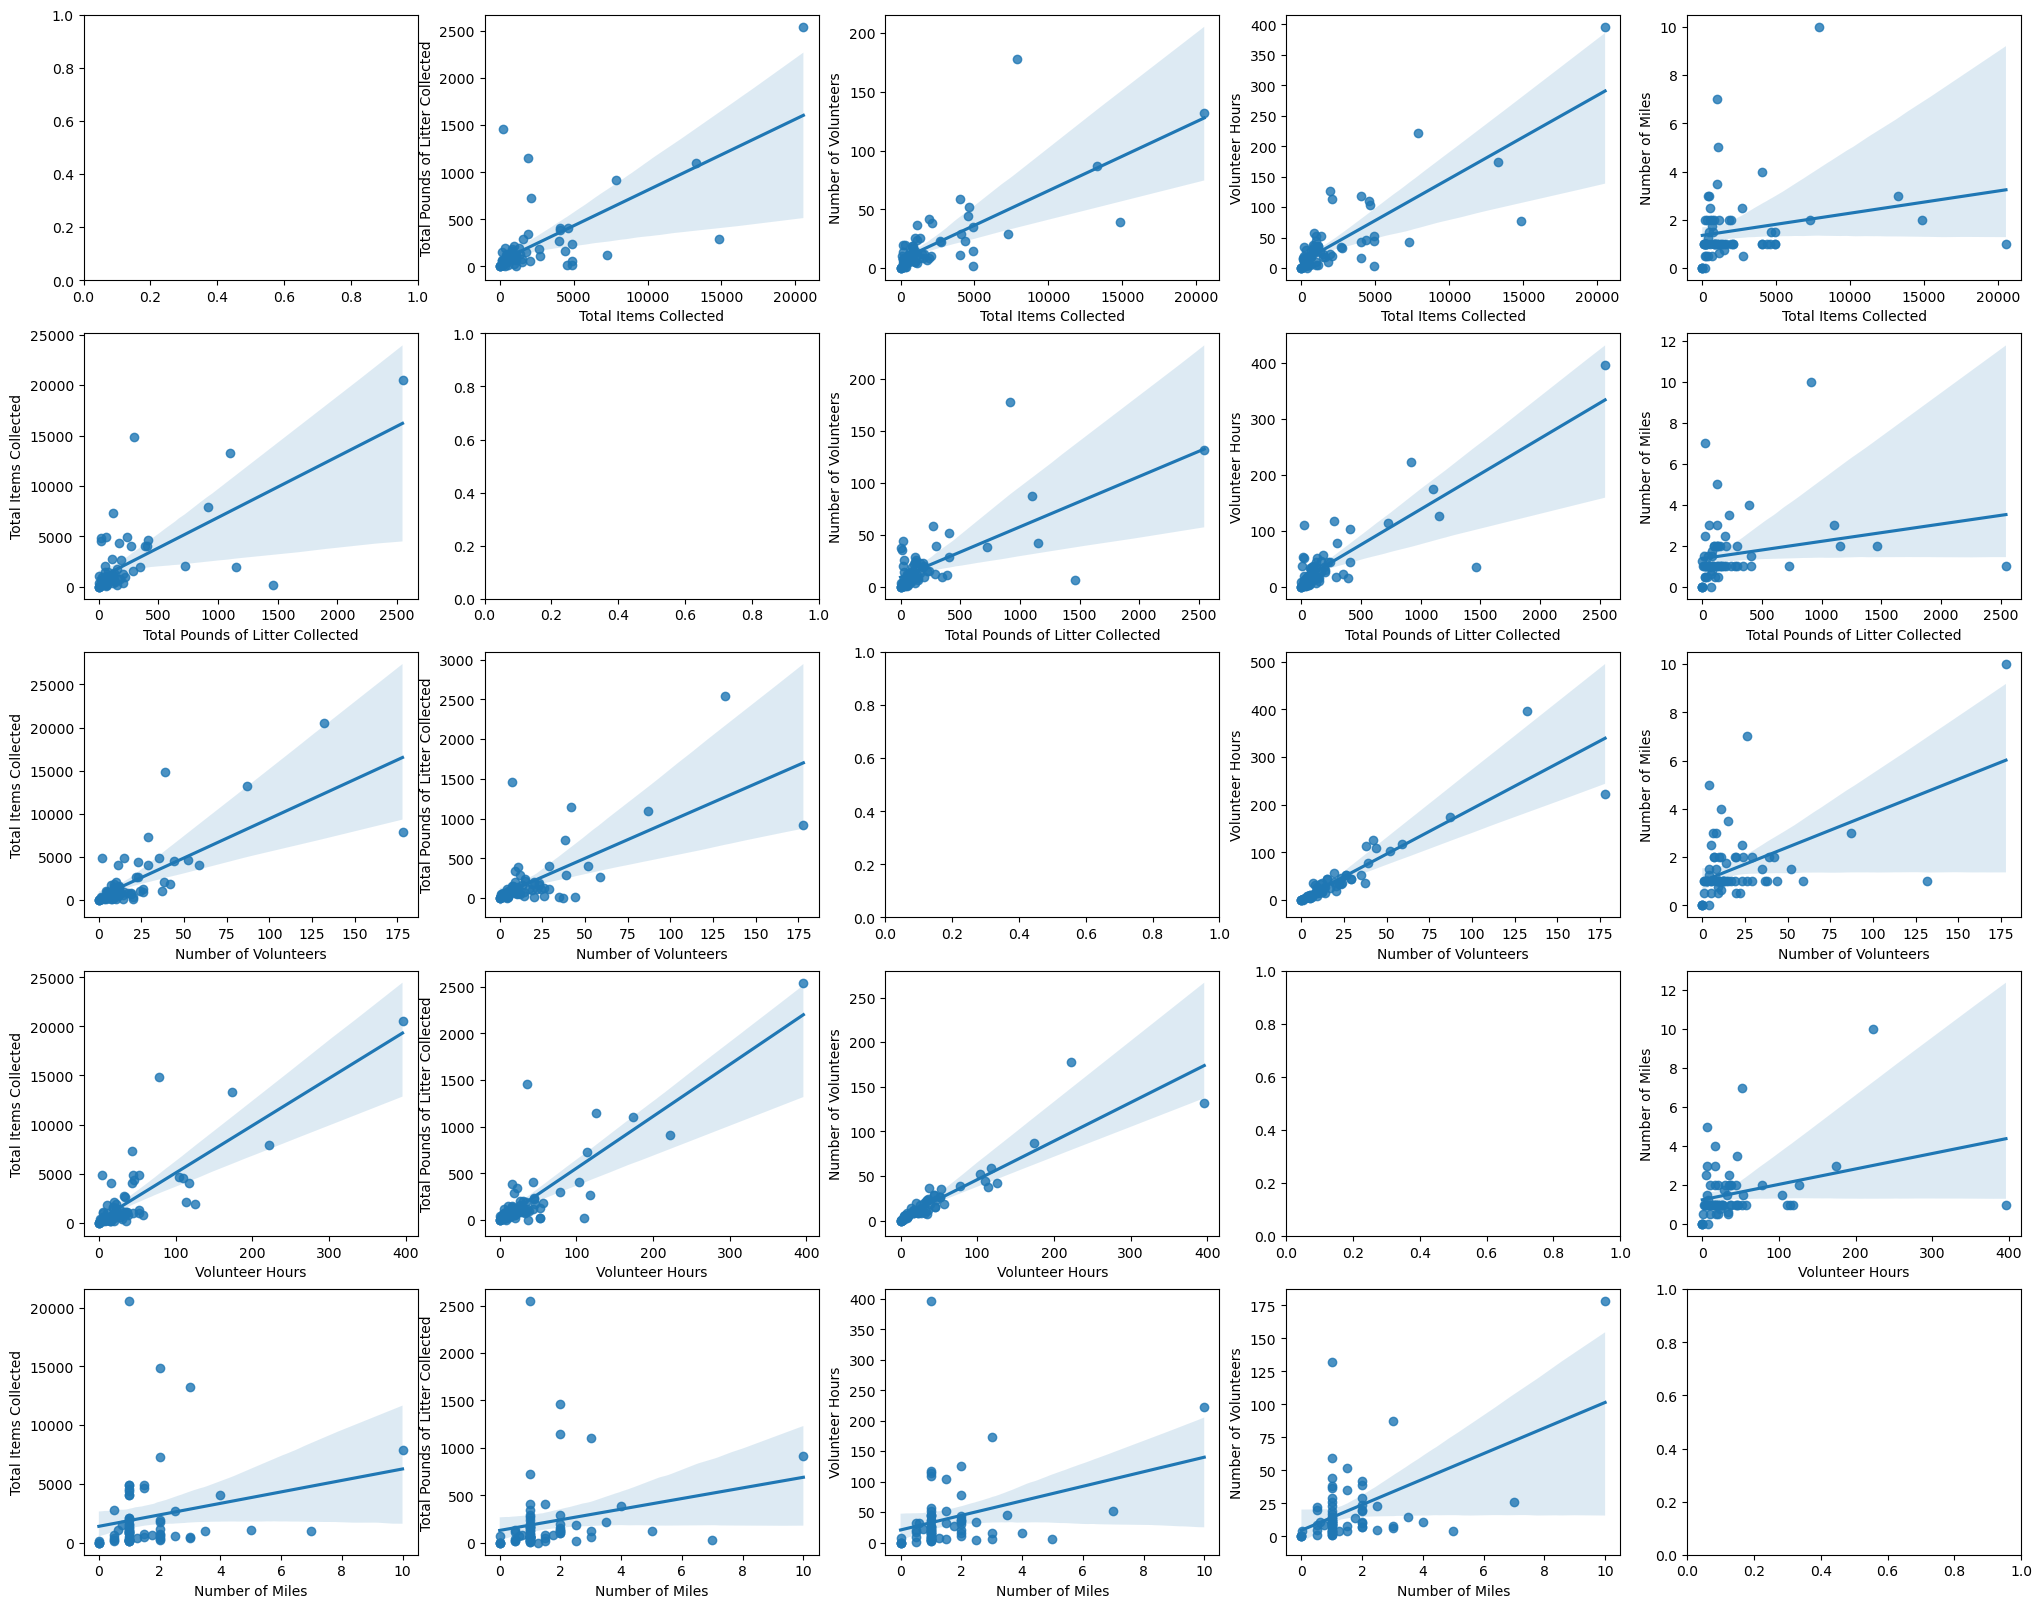

In [99]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25,20))
sns.regplot(x='Total Items Collected',y='Total Pounds of Litter Collected',data=data,fit_reg=True,ax=axes[0,1]) 
sns.regplot(x='Total Items Collected',y='Number of Volunteers',data=data,fit_reg=True,ax=axes[0,2]) 
sns.regplot(x='Total Items Collected',y='Volunteer Hours',data=data,fit_reg=True,ax=axes[0,3]) 
sns.regplot(x='Total Items Collected',y='Number of Miles',data=data,fit_reg=True,ax=axes[0,4]) 

sns.regplot(x='Total Pounds of Litter Collected',y='Total Items Collected',data=data,fit_reg=True,ax=axes[1,0]) 
sns.regplot(x='Total Pounds of Litter Collected',y='Number of Volunteers',data=data,fit_reg=True,ax=axes[1,2]) 
sns.regplot(x='Total Pounds of Litter Collected',y='Volunteer Hours',data=data,fit_reg=True,ax=axes[1,3]) 
sns.regplot(x='Total Pounds of Litter Collected',y='Number of Miles',data=data,fit_reg=True,ax=axes[1,4]) 

sns.regplot(x='Number of Volunteers',y='Total Items Collected',data=data,fit_reg=True,ax=axes[2,0]) 
sns.regplot(x='Number of Volunteers',y='Total Pounds of Litter Collected',data=data,fit_reg=True,ax=axes[2,1]) 
sns.regplot(x='Number of Volunteers',y='Volunteer Hours',data=data,fit_reg=True,ax=axes[2,3]) 
sns.regplot(x='Number of Volunteers',y='Number of Miles',data=data,fit_reg=True,ax=axes[2,4]) 


sns.regplot(x='Volunteer Hours',y='Total Items Collected',data=data,fit_reg=True,ax=axes[3,0]) 
sns.regplot(x='Volunteer Hours',y='Total Pounds of Litter Collected',data=data,fit_reg=True,ax=axes[3,1]) 
sns.regplot(x='Volunteer Hours',y='Number of Volunteers',data=data,fit_reg=True,ax=axes[3,2]) 
sns.regplot(x='Volunteer Hours',y='Number of Miles',data=data,fit_reg=True,ax=axes[3,4]) 

sns.regplot(x='Number of Miles',y='Total Items Collected',data=data,fit_reg=True,ax=axes[4,0]) 
sns.regplot(x='Number of Miles',y='Total Pounds of Litter Collected',data=data,fit_reg=True,ax=axes[4,1]) 
sns.regplot(x='Number of Miles',y='Volunteer Hours',data=data,fit_reg=True,ax=axes[4,2]) 
sns.regplot(x='Number of Miles',y='Number of Volunteers',data=data,fit_reg=True,ax=axes[4,3]) 

I'll admit this is mostly me messing around with making massive subplots and less that the data is visually clear.
However, I do think it shows that Number of Miles is least connected to any other of the summary variables, and highlights Volunteer Hours and Number of Volunteers as the tightest. It also shows off that there were a few outlier events across all categories increasing how correlated they were, closer to zero being more of a scatter.

At a glance, there is a great deal of more work that could be done in comparing what types of trash are present at locations, and determining what tend to occur together versus what simply are correlated in areas of high trash. 

The best first step would be trying to clean up location data in order to better assess how sites have changed between years (which is hard to compare with inconsistent site naming and size parameters). 